# Text Mining Q1

In [154]:
import pandas as pd
import numpy as np 
import string 
import spacy 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('Elon_musk.csv',
                   encoding='latin',
                   error_bad_lines = False)
df

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [27]:
df=df['Text']
df

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [28]:
# remove leading and trailing characters
df=[y.strip() for y in df]
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [29]:
# remove empty strings
df = [x for x in df if x] 
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [30]:
# Joining the list into one string/text
text=' '.join(df)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [31]:
#Punctuation
no_punc_text=text.translate(str.maketrans("\x92", "'", string.punctuation)) 
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [35]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens)

['kunalb11', 'I', "'m", 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It',

In [34]:
print(text_tokens[0:50])

['kunalb11', 'I', "'m", 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj']


In [36]:
len(text_tokens)

21373

In [37]:
from nltk.corpus import stopwords

In [38]:
my_stop_words=stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just']


In [41]:
#Noramalize the data
lower_words=[x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [42]:
#Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [43]:
nlp=spacy.load('en_core_web_sm')

In [44]:
doc=nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought


In [45]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:22])

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations']


In [97]:
clean_tweets=' '.join(lemmas)
clean_tweets

"kunalb11 I ' m alien IDAACarmack Ray trace Cyberpunk HDR nextlevel have try joerogan spotify great interview gtera27 Doge underestimate teslacn Congratulations Tesla China amazing execution last year now next even Happy New Year Ox httpstco9wfkmyu2oj Frodo underdoge all thought would fail himself httpstcozgxjfdzzrm OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation the entertaining outcome likely GiveDirectly just send just agree Clubhouse kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine it be get real buy Dogecoin lil x toddler hodler JoshManMode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account AstroJordy U0001F923U0001F923 this true power haha httpstcoFc9uhQSd7O freewalletorg any crypto wallet will not give private key avoid cost freewalletorg your app suck RT SpaceX NASA select Falcon Heavy launch first two element lunar Gateway together one mission http

In [46]:
# Feature Extraction

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x=vectorizer.fit_transform(lemmas)

In [48]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

kunalb11  alien  idaacarmack   ray  trace  cyberpunk   hdr  nextlevel  \
0      2695    231         2433  3615   4493        959  1670       3150   

   have   try  ...  dire  priority  surreal  propaganda  social  \
0  1665  4528  ...  1075      3504     4248        3540    4031   

   httpstcowjrzibkh1h  click  samwise  gamgee  altho  
0                2325    773     3816    1525    247  

[1 rows x 4965 columns]

In [49]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
kunalb11            2695
alien                231
idaacarmack         2433
ray                 3615
trace               4493
...                  ...
httpstcowjrzibkh1h  2325
click                773
samwise             3816
gamgee              1525
altho                247

[4965 rows x 1 columns]

In [22]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

0
ðogecoin         4964
zzcool           4963
zwiebelbach      4962
zubinanary       4961
zshauladventure  4960
zone             4959
zon              4958
zogfotpik        4957
zip2             4956
zikryzamir       4955
zero             4954
zenit            4953
zeitmas          4952
zealand          4951
zainraz4         4950
yup              4949
ystijd           4948
youyanggu        4947
yourfavgas       4946
youranonnews     4945
youranonnew      4944
your             4943
young            4942
younesh1989      4941
you              4940
york             4939
yolt             4938
yoda             4937
yo               4936
yet              4935

In [50]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

0
005             0
10              1
100             2
1000            3
10000           4
107             5
10x             6
11              7
112             8
11thhour        9
12             10
122            11
13             12
130pm          13
13arm13arm     14
13ericralph31  15
14             16
140pm          17
149watt        18
14yearold      19
15             20
150            21
155            22
16             23
162            24

In [51]:
print(vectorizer.vocabulary_)

{'kunalb11': 2695, 'alien': 231, 'idaacarmack': 2433, 'ray': 3615, 'trace': 4493, 'cyberpunk': 959, 'hdr': 1670, 'nextlevel': 3150, 'have': 1665, 'try': 4528, 'joerogan': 2615, 'spotify': 4111, 'great': 1604, 'interview': 2544, 'gtera27': 1623, 'doge': 1110, 'underestimate': 4661, 'teslacn': 4338, 'congratulations': 855, 'tesla': 4332, 'china': 739, 'amazing': 257, 'execution': 1320, 'last': 2715, 'year': 4932, 'now': 3190, 'next': 3149, 'even': 1292, 'happy': 1652, 'new': 3146, 'ox': 3307, 'httpstco9wfkmyu2oj': 1860, 'frodo': 1489, 'underdoge': 4660, 'all': 234, 'thought': 4417, 'would': 4907, 'fail': 1356, 'himself': 1716, 'httpstcozgxjfdzzrm': 2393, 'owensparks': 3304, 'flcnhvy': 1430, 'anonyx10': 286, 'haha': 1637, 'thanks': 4376, 'indeed': 2482, 'tweets': 4551, 'definitely': 1014, 'represent': 3699, 'realworld': 3641, 'time': 4436, 'allocation': 236, 'the': 4383, 'entertaining': 1248, 'outcome': 3284, 'likely': 2776, 'givedirectly': 1574, 'just': 2642, 'send': 3884, 'agree': 200, 

In [55]:
print(vectorizer.get_feature_names_out()[50:100])

['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']


In [59]:
print(x.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [60]:
print(x.toarray().shape)

(16023, 4965)


#### Let's see how can bigrams and trigrams can be included here

In [61]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,4),max_features = 100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [62]:
print(vectorizer_ngram_range.get_feature_names_out())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [63]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
## TFidf vectorizer :

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features = 500)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(df)

In [83]:
print(vectorizer_n_gram_max_features.get_feature_names_out())

['0001f525' '0001f5a4' '0001f923' '0001f923 0001f923' '20' '28delayslater'
 '60' 'about' 'absolutely' 'accurate' 'actually' 'after' 'ai'
 'ajtourville' 'all' 'almost' 'also' 'although' 'am' 'amazing' 'amp' 'an'
 'and' 'any' 'appreciated' 'archillect' 'are' 'as' 'astro_doug'
 'astrobehnken' 'astrojordy' 'astronauts' 'at' 'at tesla'
 'austinbarnard45' 'autopilot' 'back' 'bad' 'bar' 'be' 'be great' 'been'
 'being' 'berlin' 'berniesanders' 'best' 'beta' 'better' 'between' 'big'
 'bit' 'boca' 'bocachicagal' 'body' 'booster' 'boringcompany' 'both'
 'build' 'but' 'but it' 'but we' 'by' 'c_bass3d' 'can' 'car' 'cargo'
 'cars' 'caspar_stanley' 'cleantechnica' 'close' 'co' 'come' 'coming'
 'coming soon' 'companies' 'confirmed' 'congratulations' 'cool' 'cost'
 'could' 'crew' 'crew dragon' 'data' 'day' 'days' 'definitely' 'design'
 'did' 'different' 'djsnm' 'do' 'doesn' 'doge' 'doing' 'dojo' 'don' 'done'
 'down' 'dragon' 'driving' 'droneship' 'early' 'earth' 'easy' 'electric'
 'energy' 'engine' 'en

In [84]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.89309813 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


####  wordcloud 

In [85]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(60, 40))        
    plt.imshow(wordcloud)             
    plt.axis("off")                 

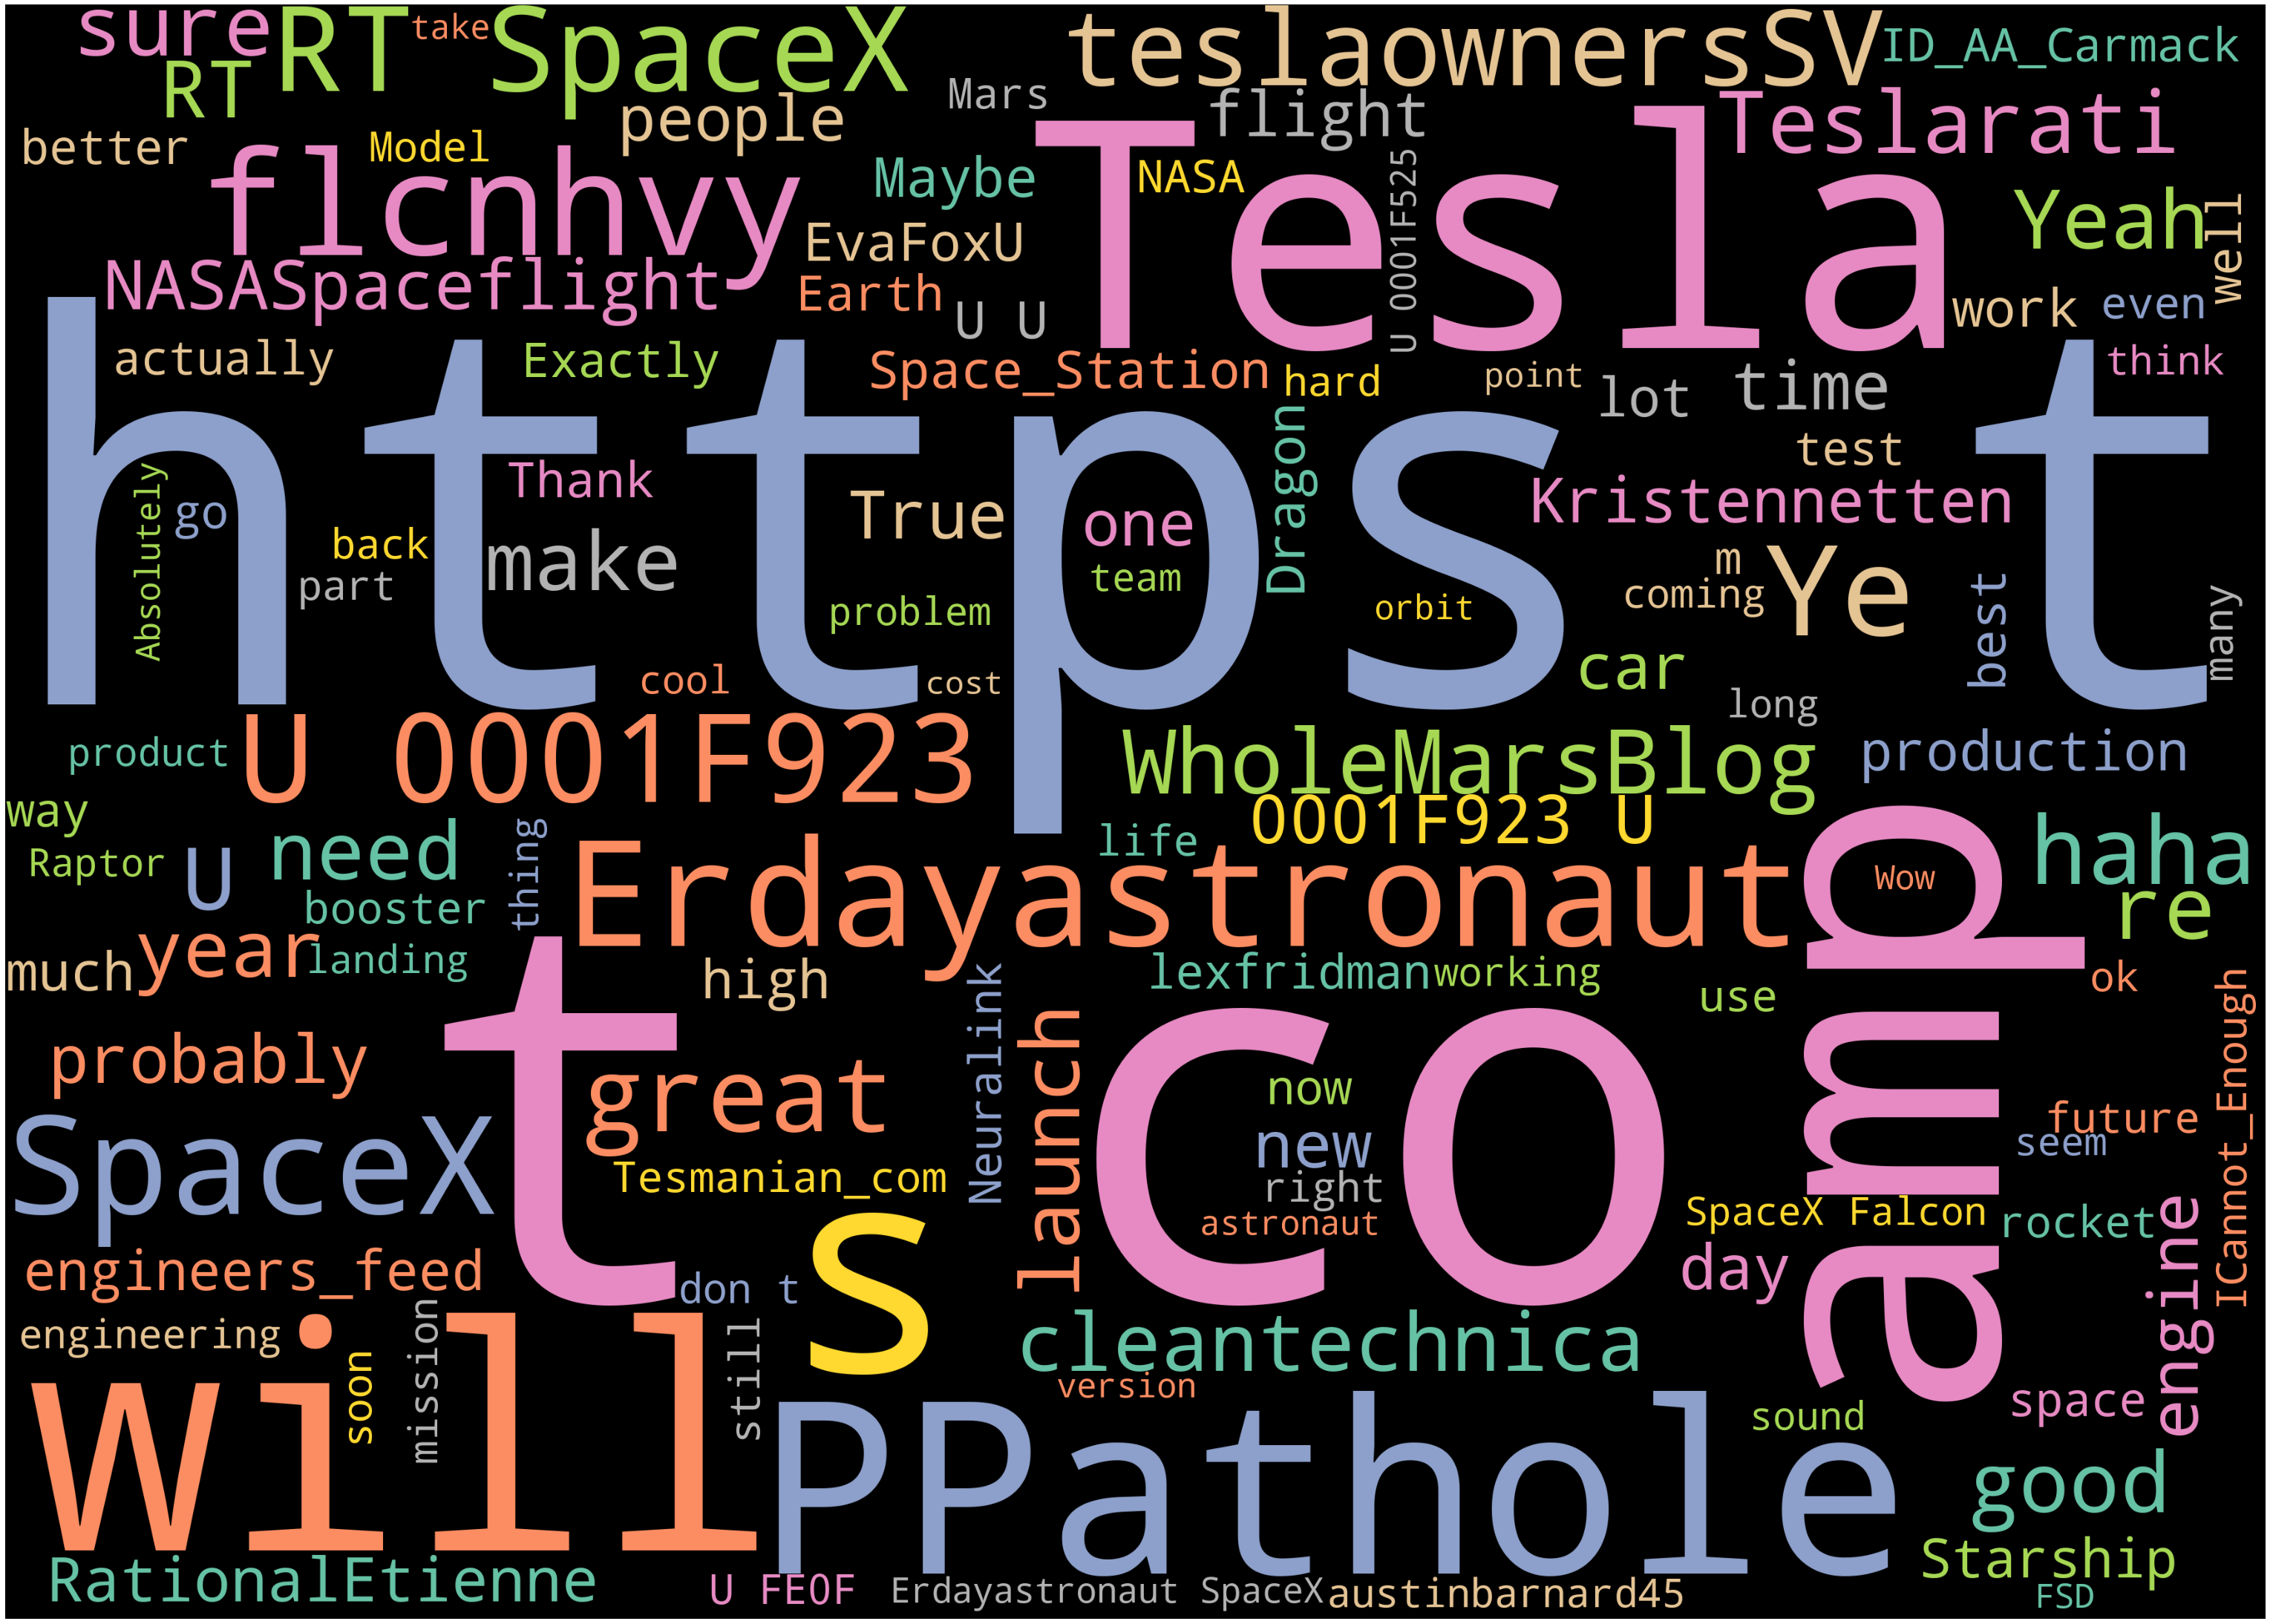

In [86]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500, height = 2500,background_color='black',max_words=120,colormap='Set2').generate(text)
plot_cloud(wordcloud)

In [88]:
df2=pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines = False)
df2

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [89]:
df2=df2['Text']
df2

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [90]:
df2=[x.strip() for x in df2] 
df22 = [x for x in df2 if x]
df2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
## Named Entity Recognition

In [98]:
nlp=spacy.load('en_core_web_sm')
one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [99]:
one_block

"kunalb11 I ' m alien IDAACarmack Ray trace Cyberpunk HDR nextlevel have try joerogan spotify great interview gtera27 Doge underestimate teslacn Congratulations Tesla China amazing execution last year now next even Happy New Year Ox httpstco9wfkmyu2oj Frodo underdoge all thought would fail himself httpstcozgxjfdzzrm OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation the entertaining outcome likely GiveDirectly just send just agree Clubhouse kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine it be get real buy Dogecoin lil x toddler hodler JoshManMode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account AstroJordy U0001F923U0001F923 this true power haha httpstcoFc9uhQSd7O freewalletorg any crypto wallet will not give private key avoid cost freewalletorg your app suck RT SpaceX NASA select Falcon Heavy launch first two element lunar Gateway together one mission http

In [100]:
for token in doc_block[:]:
    print(token, token.pos_)

kunalb11 PROPN
I PRON
' VERB
m VERB
alien ADJ
IDAACarmack PROPN
Ray PROPN
trace NOUN
Cyberpunk PROPN
HDR PROPN
nextlevel NOUN
have AUX
try VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 NOUN
Doge PROPN
underestimate VERB
teslacn NOUN
Congratulations PROPN
Tesla PROPN
China PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
Happy PROPN
New PROPN
Year PROPN
Ox PROPN
httpstco9wfkmyu2oj VERB
Frodo PROPN
underdoge NOUN
all DET
thought NOUN
would AUX
fail VERB
himself PRON
httpstcozgxjfdzzrm ADP
OwenSparks PROPN
flcnhvy PROPN
anonyx10 PROPN
Haha PROPN
thanks PROPN
flcnhvy PROPN
anonyx10 PROPN
Indeed PROPN
Tweets PROPN
definitely ADV
represent VERB
realworld NOUN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
GiveDirectly PROPN
just ADV
send AUX
just ADV
agree VERB
Clubhouse PROPN
kanyewest PROPN
httpstco3rWE9uHSTS PROPN
geoffkeighley PROPN
UnrealEngine PROPN
it PRON
be AUX
get VERB
real ADJ
buy NOUN
Dogecoin PROPN
lil 

yeah INTJ
probably ADV
month NOUN
wholemarsblog ADJ
after ADP
drive NOUN
without ADP
use NOUN
PRND PROPN
stalkstick NOUN
day NOUN
get VERB
annoying ADJ
go VERB
back ADV
amp ADJ
use NOUN
shifter PROPN
WholeMarsBlog PROPN
no DET
stalk NOUN
car NOUN
guess NOUN
drive VERB
direction NOUN
base NOUN
obstacle NOUN
see VERB
context NOUN
amp PROPN
nav NOUN
map NOUN
you PRON
httpstco6gO7EHq9qy PROPN
avalonpenrose VERB
a DET
hedge NOUN
fund NOUN
short ADJ
shrubbery NOUN
lafebra PROPN
Gfilche PROPN
httpstcom0wwqstaxm PROPN
lafebra PROPN
Gfilche PROPN
yeah INTJ
also ADV
rear ADJ
screen NOUN
0 NUM
155 NUM
mph NOUN
trap NOUN
speed NOUN
14 NUM
mile NOUN
200 NUM
mph NOUN
top ADJ
speed NOUN
right ADJ
tire NOUN
first ADJ
production NOUN
car NOUN
ever ADV
achieve VERB
0 NUM
60 NUM
mph NOUN
less ADJ
2 NUM
second NOUN
it PRON
play VERB
Cyberpunk PROPN
Plaid PROPN
Model PROPN
S PROPN
ship NOUN
next ADJ
month NOUN
httpstcohfuptnqipb VERB
even ADV
Discord PROPN
go VERB
corpo NOUN
Jason PROPN
Yup PROPN
Wild ADJ


public ADJ
space NOUN
around ADP
production NOUN
amp NOUN
launch NOUN
site NOUN
wherever SCONJ
do VERB
httpstcowmqwct2wfh VERB
Christo49699922 PROPN
sean18743005 NOUN
Erdayastronaut PROPN
SpaceX PROPN
that SCONJ
sean18743005 INTJ
Erdayastronaut PROPN
SpaceX PROPN
Catapult PROPN
high ADJ
air NOUN
amp PROPN
land PROPN
roof PROPN
base PROPN
jumping NOUN
parachute NOUN
way NOUN
travel NOUN
Erdayastronaut PROPN
SpaceX PROPN
that PRON
be VERB
actually ADV
restaurant NOUN
SpaceX PROPN
build VERB
futuristic ADJ
bar NOUN
top PROPN
h PROPN
httpstcoz2UmtGSAoI PROPN
techreview NOUN
and CCONJ
increase VERB
fun NOUN
hopefully ADV
benmezrich NOUN
I PRON
neither CCONJ
tonychomrmagic VERB
TeslaEnergy PROPN
one NUM
good ADJ
Tesla PROPN
Solar PROPN
Roof PROPN
installation NOUN
91demigod PROPN
no INTJ
maybe ADV
one NUM
day NOUN
PPathole PROPN
engineersfee NOUN
yes INTJ
would AUX
well ADV
way VERB
a DET
large ADJ
solar ADJ
field NOUN
reactor NOUN
need VERB
po PROPN
httpstcoPh6x1PlnaM PROPN
engineersfee PRO

possible ADJ
u2665ufe0f NOUN
love NOUN
u PROPN
crazy PROPN
ppl PROPN
U2665UFE0F PROPN
BizzzzzyD PROPN
you PRON
point VERB
sigh PROPN
pcgamer PROPN
Great PROPN
game NOUN
flcnhvy NOUN
pretty ADV
much ADV
the DET
main ADJ
value NOUN
college NOUN
use NOUN
hang VERB
pseudo NOUN
intellectual ADJ
conversation NOUN
amp PROPN
httpstco0s0ybscm0p NOUN
come ADJ
comment NOUN
stay VERB
memesu0001f484 ADJ
padgeuk NOUN
absolutely ADV
we PRON
release VERB
FSD PROPN
subscription NOUN
early ADV
next ADJ
year NOUN
one NUM
word NOUN
Doge PROPN
Bitcoin PROPN
almost ADV
bs ADJ
fiat PROPN
money NOUN
hajekmiloslav VERB
Great PROPN
nail NOUN
amp PROPN
lipstick NOUN
MightyTesla PROPN
Kristennetten PROPN
laurenkalo ADJ
SawyerMerritt PROPN
jasondebolt NOUN
CodingMark PROPN
28delayslater PROPN
BabyTesla3 NOUN
httpstcodvwzgtppda VERB
httpstcoEbOjGshvrq NOUN
CallowayTech PROPN
sound VERB
right ADJ
Lord PROPN
Edge PROPN
xdreamcode NOUN
frankthelen VERB
nice ADJ
branding NOUN
just ADV
kid NOUN
need VERB
safe ADJ
word

3 NUM
engin NOUN
httpstco7ojorqnhb6 NOUN
Erdayastronaut PROPN
MarcusHouseGame PROPN
maybe ADV
start VERB
year NOUN
depend VERB
Starship PROPN
progress NOUN
go VERB
RationalEtienne PROPN
MarcusHouseGame PROPN
not PART
yet ADV
StarshipFairing PROPN
marcushousegame VERB
not PART
bad ADJ
we PRON
definitely ADV
need VERB
engine NOUN
make VERB
cargo NOUN
bay PROPN
propel PROPN
httpstcoj2uVULTatv PROPN
MarcusHouseGame PROPN
Rapid PROPN
amp ADJ
complete ADJ
rocket NOUN
reuse NOUN
low ADJ
cost NOUN
propellant NOUN
orbital ADJ
refill NOUN
amp NOUN
propellant NOUN
production NOUN
httpstcoumyur7yshy PRON
Erdayastronaut PROPN
PPathole PROPN
Teslarati PROPN
TeslaRoadTrip NOUN
yes INTJ
PPathole PROPN
Teslarati PROPN
teslaroadtrip NOUN
we PRON
be VERB
still ADV
far ADV
simply ADV
video NOUN
control NOUN
the DET
big ADJ
gamechanger NOUN
cu PROPN
httpstconb5Hl7gzlx PROPN
Teslarati PROPN
teslaroadtrip VERB
FSD PROPN
Beta PROPN
5 NUM
come VERB
day NOUN
improvement NOUN
significant ADJ
XHNews PROPN
excitin

erujabidi VERB
yeah INTJ
I PRON
feel VERB
pretty ADV
normal ADJ
no DET
symptom NOUN
right ADV
last ADJ
week NOUN
I PRON
sym VERB
httpstcogl0mhrqjxy PROPN
PPathole PROPN
AstroJordy PROPN
erujabidi NOUN
do AUX
test VERB
several ADJ
different ADJ
lab NOUN
time NOUN
day NOUN
administer NOUN
RN PROPN
amp PROPN
httpstcohajhh7la7q NOUN
PPathole PROPN
MarioLivio PROPN
both PRON
obv VERB
insanely ADV
great ADJ
bad ADJ
pointless ADJ
argument NOUN
Astronaut PROPN
launch NOUN
today NOUN
httpstco3FAzZGss8c PROPN
RT PROPN
NASA PROPN
U0001F338 PROPN
AstroSoichi PROPN
message NOUN
boy NOUN
girl NOUN
Japan PROPN
Space PROPN
wait VERB
in ADP
Tumblr PROPN
Spotlight PROPN
JAXAen PROPN
astronaut NOUN
so SCONJ
RT PROPN
NASA PROPN
this DET
week NOUN
u0001f680 PROPN
nasa PROPN
SpaceX PROPN
Crew1 PROPN
astronaut PROPN
arrive PROPN
NASAKennedy PROPN
ahead ADV
launch NOUN
U0001F534 VERB
our PRON
nasapersevere ADJ
rover PROPN
mark PROPN
100 NUM
day NOUN
RT PROPN
AstroSoichi PROPN
SpaceX PROPN
NASA PROPN
Crew1 PRO

exactly ADV
solve VERB
a DET
New PROPN
Banner PROPN
need AUX
neither CCONJ
hard ADV
leave VERB
right ADJ
PPathole PROPN
another DET
fine ADJ
day NOUN
simulation NOUN
Nereide PROPN
Faraday PROPN
invent NOUN
electric ADJ
motor PROPN
Tesla PROPN
commutatorfree NOUN
threephase NOUN
AC PROPN
induction NOUN
motor PROPN
httpstcocQo2rjLRBv PROPN
Nereide PROPN
Maxwell PROPN
amazing ADJ
should AUX
recognition VERB
Tesla PROPN
Motors PROPN
Inc PROPN
almost ADV
call VERB
Faraday PROPN
httpstco6y42kmcpgk NOUN
420 NUM
ten NUM
time NOUN
well INTJ
42 NUM
U0001F917 PROPN
RT PROPN
SpaceX PUNCT
Deployment PROPN
GPS PROPN
III4 PROPN
confirm VERB
httpstcofCFJRcWMti PROPN
RT PROPN
SpaceX PROPN
Falcon PROPN
9 NUM
's PART
first ADJ
stage NOUN
land NOUN
of ADP
course NOUN
I PRON
still ADV
love VERB
you PRON
droneship NOUN
httpstcohd0ibpx3t5 NOUN
RT PROPN
SpaceX PUNCT
Liftoff PROPN
httpstcoLI4O0TNmL8 PROPN
LinusTech PROPN
spacexstarlink NOUN
SpaceX PROPN
await ADJ
approval NOUN
canadian ADJ
authority NOUN
Recru

cold ADJ
gas NOUN
hot ADV
later ADV
Rubix161 VERB
I PRON
mean VERB
ya PRON
get VERB
to ADP
tiki ADJ
bar NOUN
Starship PROPN
nosecone VERB
high PROPN
bay PROPN
amp PROPN
tiki PROPN
bar PROPN
httpstco9qXYxMMIUj PROPN
IEEEorg PROPN
Erdayastronaut PROPN
after SCONJ
get VERB
orbit NOUN
time NOUN
Erdayastronaut PROPN
get VERB
little ADJ
melty NOUN
tbh NOUN
Erdayastronaut PROPN
those DET
engine NOUN
could AUX
go VERB
300 NUM
bar NOUN
would AUX
dicey VERB
push ADJ
nearterm NOUN
test NOUN
not PART
achieve VERB
httpstcopULPf49me1 PROPN
Erdayastronaut PROPN
Raptor PROPN
run VERB
90 NUM
sec PROPN
300 NUM
bar NOUN
chamber NOUN
pressure NOUN
encountering VERB
issue NOUN
210 NUM
mtf PROPN
sea NOUN
httpstcoRg2eRWhZnT PROPN
FSD PROPN
beta NOUN
rollout NOUN
happen VERB
tonight NOUN
will AUX
extremely ADV
slow VERB
amp ADJ
cautious ADJ
Data PROPN
3 NUM
engine NOUN
starship NOUN
static NOUN
fire NOUN
morning NOUN
look VERB
good ADJ
proceed NOUN
nosecone NOUN
mate NOUN
PPathole PROPN
toadmeister NOUN
yes I

yes INTJ
PPathole PROPN
TashaARK PROPN
yeah INTJ
provide VERB
metal NOUN
gear NOUN
snake NOUN
autocoupl PROPN
TashaARK PROPN
Waymo PROPN
impressive ADJ
highly ADV
specialized ADJ
solution NOUN
the DET
Tesla PROPN
approach VERB
general ADJ
solution NOUN
the DET
lat PROPN
httpstcobbchdqhjja NOUN
akidesir NOUN
Kristennetten PROPN
yeah INTJ
could AUX
put VERB
set VERB
allow ADJ
drop NOUN
low ADJ
5 NUM
ErcXspace PROPN
SpaceX PUNCT
Erdayastronaut PROPN
MarcusHouseGame PROPN
FelixSchlang PROPN
Great PROPN
render NOUN
note NOUN
need VERB
arm NOUN
httpstco9g2N7FvSCZ PROPN
Kristennetten PROPN
Mimecraft PROPN
TeslaGong PROPN
TeslaTested PROPN
yes INTJ
ICannotEnough PROPN
TeslaTested PROPN
Autopilot PROPN
team NOUN
make VERB
great ADJ
progress NOUN
reality NOUN
sure ADV
complicated ADJ
ErcXspace PROPN
MarcusHouseGame NUM
brendan2908 ADP
bocachicagal ADJ
NASASpaceflight NUM
aspiring VERB
flame NOUN
diverter PROPN
Boca PROPN
httpstcokyenxz94oy PROPN
eugenelee3 NOUN
marcushousegame NOUN
brendan2908 A

range NOUN
EvaFoxU PROPN
RationalEtienne PROPN
WholeMarsBlog PROPN
yes INTJ
UniverCurious PROPN
physicsJ NOUN
Light PROPN
fast ADV
would AUX
think VERB
RT PROPN
SpaceX PROPN
once SCONJ
Dragon PROPN
dock VERB
spacestation NOUN
two NUM
Dragons PROPN
dock VERB
simultaneously ADV
between ADP
crew NOUN
cargo NOUN
mission NOUN
RT PROPN
SpaceX PROPN
SpaceX PROPN
training NOUN
astronaut NOUN
fly VERB
board NOUN
Dragon PROPN
's PART
first ADJ
operational ADJ
mission NOUN
complete ADJ
when SCONJ
crew NOUN
arrive VERB
RT PROPN
SpaceX PROPN
after ADP
launch NOUN
Crew PROPN
Dragon PROPN
's PART
first ADJ
operational ADJ
mission NOUN
astronaut PROPN
board PROPN
SpaceX PROPN
launch PROPN
21st NOUN
cargo NOUN
resupply ADV
mi ADJ
samtalkstesla ADJ
maybe ADV
use VERB
many ADJ
magenta NOUN
spotlight NOUN
RT PROPN
KathyLueders PROPN
NEWS PROPN
we PRON
be VERB
target NOUN
240am PROPN
ET PROPN
Saturday PROPN
Oct PROPN
31 NUM
launch NOUN
NASA PROPN
SpaceX PROPN
Crew1 PROPN
mission NOUN
send VERB
ast ADV
Vala

WholeMarsBlog VERB
exactly ADV
problem NOUN
like ADP
address NOUN
PPathole PROPN
WholeMarsBlog PROPN
yes INTJ
good ADJ
insight NOUN
samiralyateem NOUN
wholemarsblog VERB
all DET
frame NOUN
stitch VERB
single ADJ
frame NOUN
tricky ADJ
camera NOUN
overlap NOUN
different ADJ
way NOUN
httpstcoyzCixdgm38 PROPN
WhatsupFranks PROPN
brandonbernicky NOUN
WholeMarsBlog PROPN
much ADV
flcnhvy PROPN
WholeMarsBlog PROPN
yes INTJ
brandonbernicky ADJ
wholemarsblog PROPN
release NOUN
private ADJ
beta NOUN
2 NUM
4 NUM
week NOUN
public ADJ
beta NOUN
early ADJ
access NOUN
owner NOUN
opt VERB
httpstcoOYCpr9I9Hq PROPN
WholeMarsBlog PROPN
and CCONJ
still ADV
not PART
use VERB
dramatically ADV
well INTJ
4d NOUN
aka ADV
simultaneous ADJ
surround NOUN
video NOUN
8 NUM
camera NOUN
architecture NOUN
cbass3d NOUN
NASASpaceflight PROPN
marcushousegame NOUN
Cool PROPN
richardreinariv NOUN
he PRON
clue VERB
Astra PROPN
Sorry PROPN
hear VERB
I PRON
' VERB
m VERB
sure ADJ
will AUX
figure VERB
though ADV
take VERB
we

's PART
lab NOUN
apply VERB
work NOUN
neuralink NOUN
Ahem PROPN
start VERB
soon ADV
httpstcoeCGHH5stOn PUNCT
all PROPN
physic NOUN
either CCONJ
impossible ADJ
trivial ADJ
it PRON
impossible ADJ
understand NOUN
become VERB
trivial ADJ
e NOUN
Rutherford PROPN
flcnhvy PROPN
Giant PROPN
gap NOUN
experimental ADJ
medical ADJ
device NOUN
use VERB
patient ADJ
extreme ADJ
medical ADJ
problem NOUN
amp PROPN
wid PROPN
httpstcof0FIB1W94Z PROPN
tobyliiiiiiiiii PROPN
Erdayastronaut PROPN
flcnhvy PROPN
DJSnM PROPN
Testing PROPN
short ADJ
RVac PROPN
skirt NOUN
go VERB
well ADV
full ADJ
length NOUN
skirt NOUN
test NOUN
come VERB
soon ADV
Neuralink PROPN
product NOUN
demo NOUN
3 NUM
hour NOUN
webcast ADJ
httpstcoy9wred78oj NOUN
Erdayastronaut PROPN
flcnhvy PROPN
DJSnM PROPN
Raptor PROPN
reach VERB
230 NUM
mtf ADJ
half NOUN
million NUM
pound NOUN
thrust NOUN
peak NOUN
pressure NOUN
wit NOUN
httpstco1sPnwBelpA PROPN
nextspaceflight PROPN
Good PROPN
chance NOUN
something PRON
slip VERB
yeah INTJ
Sunday 

Filters PROPN
plural NOUN
nickcappelli PROPN
Grimezsz PROPN
Yes INTJ
be AUX
call VERB
Cyber PROPN
Girl PROPN
we PRON
must AUX
pass VERB
the DET
Great PROPN
Filter PROPN
sound NOUN
right ADJ
httpstcodm76FJq3hX PROPN
Drrami PROPN
tomdestella NOUN
RobertDowneyJr PROPN
seriously ADV
longelon VERB
crysis NOUN
rock NOUN
a DET
truly ADV
useful ADJ
exaflop NOUN
de X
facto X
FP32 PROPN
Kristennetten PROPN
engineersfeed ADJ
Metal PROPN
fudgelike NOUN
consistency NOUN
near ADP
melting NOUN
point NOUN
smoosh ADV
together ADV
engineersfee NOUN
this PRON
make VERB
Falcon PROPN
9 NUM
httpstcomDoPO17YB9 PROPN
httpstco326rkUEYW8 PROPN
flcnhvy PROPN
ICannotEnough PROPN
Tesla PROPN
this DET
hand NOUN
hard ADV
predict VERB
maybe ADV
order VERB
10 NUM
billion NUM
km NOUN
httpstco38fzby8pno PROPN
austinbarnard45 INTJ
yes INTJ
realwillreil NOUN
GiulioCoraggio PROPN
U0001F923U0001F923 PROPN
hasty ADJ
govt NOUN
U0001F923U0001F923 PROPN
teslaownersSV PROPN
PPathole PROPN
ICannotEnough PROPN
flcnhvy PROPN
Tesla 

Dragon PROPN
loss NOUN
signal NOUN
due ADJ
atmospheric ADJ
entry NOUN
plasma NOUN
Dragon PROPN
travel NOUN
south ADJ
New PROPN
Zealand PROPN
Florida PROPN
37 NUM
minute NOUN
come VERB
hot ADJ
httpstcodzFr5BNBfF PROPN
Astronauts PROPN
land NOUN
2 NUM
hour NOUN
NASA PROPN
SpaceX PROPN
RT PROPN
SpaceX PROPN
Crew PROPN
Dragon PROPN
's PART
flight NOUN
back ADV
Earth PROPN
AstroBehnken PROPN
AstroDoug PROPN
remain VERB
track NOUN
target NOUN
splashdown PROPN
coast PROPN
P PROPN
Erdayastronaut PROPN
SpaceX PROPN
however ADV
prove VERB
SuperDraco PROPN
landing NOUN
could AUX
work VERB
propulsive ADJ
hover VERB
httpstcomr7vfiqwwf PROPN
Erdayastronaut PROPN
SpaceX PROPN
all DET
correct ADJ
Parachutes PROPN
originally ADV
backup ADJ
landing NOUN
system NOUN
SuperDraco PROPN
thruster NOUN
httpstco941a2odu5h PROPN
meier1028 PROPN
SpaceX PROPN
SpaceStation PROPN
AstroBehnken PROPN
AstroDoug PROPN
great ADJ
game NOUN
NatalCicuto PROPN
Tesla PROPN
Kristennetten PROPN
TeslaForTheWin PROPN
Working PROP

forward ADV
build VERB
Giga PROPN
Texas PROPN
sciguyspace NOUN
Competition PROPN
ensure VERB
company NOUN
work NOUN
hard ADV
serve VERB
need NOUN
customer NOUN
schristakos ADJ
pubg PROPN
something PRON
fun NOUN
come VERB
vincent13031925 PROPN
UniversalPics PROPN
TomCruise PROPN
SpaceX PROPN
could AUX
great PROPN
teslaownersSV PROPN
cleantechnica NOUN
that PRON
be VERB
great ADJ
idea NOUN
Tesla PROPN
we PRON
actually ADV
look VERB
revolutionary ADJ
actuary NOUN
Tesla PROPN
Insurance PROPN
please INTJ
inquire VERB
interested ADJ
cleantechnica PROPN
Tbh PROPN
bit NOUN
less ADV
foolish ADJ
RT PROPN
CommercialCrew PROPN
while SCONJ
orbit NOUN
astronaut NOUN
AstroBehnken PROPN
AstroDoug PROPN
perform VERB
habitability NOUN
assessment NOUN
SpaceX PUNCT
Crew PROPN
Drago PROPN
Teslarati PROPN
retail ADJ
investor NOUN
like ADP
hyperchangetv NOUN
remarkably ADV
insightful ADJ
also ADV
ARKInvest PROPN
sciguyspace NOUN
especially ADV
boost VERB
stage NOUN
volumetrically ADV
constrain VERB
CH4 PROPN

Teslarati PROPN
we PRON
increase VERB
wire NOUN
thickness NOUN
sx PROPN
reduce VERB
resistive ADJ
heating NOUN
Technically ADV
httpstcotcivzvc5ra PROPN
MightyTesla PROPN
samtalkstesla ADJ
ElonsWorld PROPN
NikolaTruth PROPN
WholeMarsBlog PROPN
RenataKonkoly PROPN
stevenmarkryan PROPN
httpstcoiU3lMUqeS5 PROPN
WholeMarsBlog PROPN
thank VERB
PPathole PROPN
that DET
nearterm NOUN
danger NOUN
AI PROPN
nichegamer NOUN
I PRON
not PART
mind VERB
DA2 PROPN
DA1 PROPN
awesome PROPN
Mass PROPN
Effect PROPN
2 NUM
talk NOUN
sequel NOUN
amazing ADJ
MKBHD PROPN
Haha PROPN
OprahSide PROPN
maybe ADV
design VERB
flag NOUN
Mars PROPN
engineersfee NOUN
48 NUM
65 NUM
78 NUM
20 NUM
74 NUM
6f NUM
20 NUM
74 NUM
65 NUM
78 NUM
74 NUM
httpstco1mqxfakpzf PROPN
I PRON
speak VERB
Korolev PROPN
's PART
family NOUN
today NOUN
he PRON
one NUM
good ADJ
u041au043eu0440u043eu043bu044cu043eu0432 NOUN
u041au043eu0440u043eu043bu0451u0432 NOUN
AliAfshari PROPN
in ADP
general ADJ
need AUX
improve VERB
podcast NOUN
play NOUN
Opt

In [101]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
nouns_verbs

["'",
 'm',
 'trace',
 'nextlevel',
 'try',
 'spotify',
 'interview',
 'gtera27',
 'underestimate',
 'teslacn',
 'execution',
 'year',
 'httpstco9wfkmyu2oj',
 'underdoge',
 'thought',
 'fail',
 'represent',
 'realworld',
 'time',
 'allocation',
 'outcome',
 'agree',
 'get',
 'buy',
 'lil',
 'toddler',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'freewalletorg',
 'thank',
 'fix',
 'unlock',
 'account',
 'power',
 'haha',
 'freewalletorg',
 'wallet',
 'give',
 'avoid',
 'cost',
 'freewalletorg',
 'app',
 'suck',
 'select',
 'launch',
 'element',
 'mission',
 'predict',
 'cash',
 'flow',
 'endeavor',
 'need',
 'pass',
 'cash',
 'flow',
 'year',
 'cost',
 'ton',
 'carbon',
 'sequester',
 'value',
 'product',
 'make',
 'scalable',
 'g',
 'price',
 'country',
 'difference',
 'tax',
 'amp',
 'shipping',
 'tobyliiiiiiiiii',
 'intend',
 'idea',
 'apply',
 'team',
 'manage',
 'carbon',
 'capture',
 'prize',
 'httpstcofsw5ianl0r',
 'receive',
 'stock',
 'comp',
 'stockoption',
 'take',
 'table',
 

In [102]:
len(nouns_verbs)

5895

In [103]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(nouns_verbs)
X

<5895x2177 sparse matrix of type '<class 'numpy.int64'>'
	with 5833 stored elements in Compressed Sparse Row format>

In [104]:
X.shape

(5895, 2177)

In [105]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [107]:
cv.get_feature_names_out()

array(['130pm', '1st', '20k', ..., 'youranonnews', 'yourfavgas',
       'youyanggu'], dtype=object)

In [109]:
temp_df=pd.DataFrame(X.toarray(), columns = cv.get_feature_names_out())
temp_df

130pm  1st  20k  21st  25d  25k  28th  39a  3d  445pm  ...  wrong  wtf  \
0         0    0    0     0    0    0     0    0   0      0  ...      0    0   
1         0    0    0     0    0    0     0    0   0      0  ...      0    0   
2         0    0    0     0    0    0     0    0   0      0  ...      0    0   
3         0    0    0     0    0    0     0    0   0      0  ...      0    0   
4         0    0    0     0    0    0     0    0   0      0  ...      0    0   
...     ...  ...  ...   ...  ...  ...   ...  ...  ..    ...  ...    ...  ...   
5890      0    0    0     0    0    0     0    0   0      0  ...      0    0   
5891      0    0    0     0    0    0     0    0   0      0  ...      0    0   
5892      0    0    0     0    0    0     0    0   0      0  ...      0    0   
5893      0    0    0     0    0    0     0    0   0      0  ...      0    0   
5894      0    0    0     0    0    0     0    0   0      0  ...      0    0   

      xdreamcode  xdreamcoding  year  yesterday  yoda  youranonnews  \
0              0             0     0          0     0             0   
1              0             0     0          0     0             0   
2              0             0     0          0     0             0   
3              0             0     0          0     0             0   
4              0             0     0          0     0             0   
...          ...           ...   ...        ...   ...           ...   
5890           0             0     0          0     0             0   
5891           0             0     0          0     0             0   
5892           0             0     0          0     0             0   
5893           0             0     0          0     0             0   
5894           0             0     0          0     0             0   

      yourfavgas  youyanggu  
0              0          0  
1              0          0  
2              0          0  
3              0          0  
4              0          0  
...          ...        ...  
5890           0          0  
5891           0          0  
5892           0          0  
5893           0          0  
5894           0          0  

[5895 rows x 2177 columns]

In [110]:
sum_words=X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [111]:
type(sum_words)

numpy.matrix

In [112]:
cv.vocabulary_

{'trace': 1991,
 'nextlevel': 1283,
 'try': 2015,
 'spotify': 1794,
 'interview': 1019,
 'gtera27': 731,
 'underestimate': 2059,
 'teslacn': 1919,
 'execution': 588,
 'year': 2171,
 'httpstco9wfkmyu2oj': 821,
 'underdoge': 2058,
 'thought': 1949,
 'fail': 608,
 'represent': 1570,
 'realworld': 1535,
 'time': 1960,
 'allocation': 58,
 'outcome': 1336,
 'agree': 47,
 'get': 706,
 'buy': 242,
 'lil': 1121,
 'toddler': 1973,
 'issue': 1029,
 'sentencing': 1682,
 'seem': 1672,
 'bit': 189,
 'freewalletorg': 671,
 'thank': 1934,
 'fix': 643,
 'unlock': 2066,
 'account': 25,
 'power': 1445,
 'haha': 737,
 'wallet': 2105,
 'give': 710,
 'avoid': 140,
 'cost': 385,
 'app': 85,
 'suck': 1849,
 'select': 1673,
 'launch': 1090,
 'element': 541,
 'mission': 1234,
 'predict': 1449,
 'cash': 270,
 'flow': 653,
 'endeavor': 554,
 'need': 1273,
 'pass': 1372,
 'ton': 1978,
 'carbon': 262,
 'sequester': 1687,
 'value': 2080,
 'product': 1473,
 'make': 1170,
 'scalable': 1646,
 'price': 1457,
 'country':

In [113]:
sorted(cv.vocabulary_)

['130pm',
 '1st',
 '20k',
 '21st',
 '25d',
 '25k',
 '28th',
 '39a',
 '3d',
 '445pm',
 '4d',
 '727pm',
 '9inety6prince',
 'absence',
 'absorb',
 'absorption',
 'absurd',
 'academia',
 'accel',
 'accelera',
 'accelerate',
 'accelerator',
 'accept',
 'access',
 'accommodate',
 'account',
 'accura',
 'ace',
 'achieve',
 'achievement',
 'action',
 'activity',
 'actuary',
 'add',
 'address',
 'administer',
 'adult',
 'advance',
 'advantage',
 'adventure',
 'advertise',
 'advice',
 'advise',
 'affect',
 'afternoon',
 'age',
 'agony',
 'agree',
 'aim',
 'air',
 'aircraft',
 'airplane',
 'ajtourville',
 'akidesir',
 'akinfermo',
 'alertalarm',
 'alesssj4',
 'aliens',
 'allocation',
 'allow',
 'alloy',
 'altitude',
 'aluminum',
 'alvianchoiri',
 'amaze',
 'amazing',
 'amoghbhushan',
 'amount',
 'amp',
 'amplification',
 'amplitude',
 'amyceskridge',
 'analog',
 'analysis',
 'anasisii',
 'anbuteau',
 'andrewbogut',
 'angle',
 'annerajb',
 'announce',
 'anode',
 'answer',
 'antenna',
 'antonioetay

In [115]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names_out(),'count' : np.array(sum_words).flatten()})
wf_df

word  count
0            130pm      1
1              1st      1
2              20k      1
3             21st      1
4              25d      1
...            ...    ...
2172     yesterday      4
2173          yoda      1
2174  youranonnews      1
2175    yourfavgas      1
2176     youyanggu      1

[2177 rows x 2 columns]

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

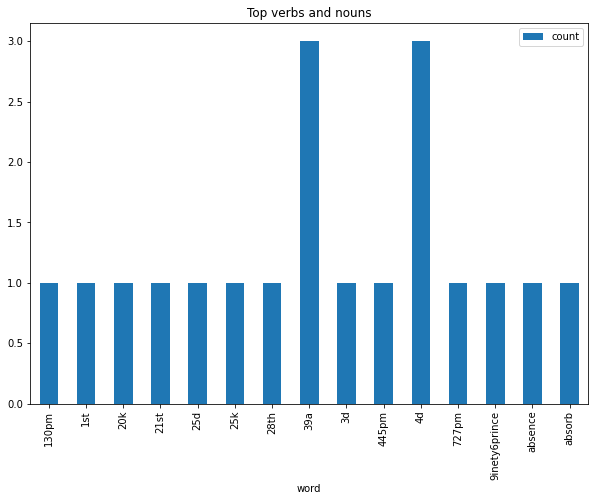

In [116]:
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

In [117]:
## Emotion Mining

In [120]:
#Sentiment analysis
neg=pd.read_csv('Afinn.csv', error_bad_lines=False, sep = ",", encoding = 'latin-1')
neg

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [121]:
print(neg[100:800])

          word  value
100      alarm     -2
101    alarmed     -2
102   alarmist     -2
103  alarmists     -2
104       alas     -1
..         ...    ...
795       dull     -2
796       dumb     -3
797    dumbass     -3
798       dump     -1
799     dumped     -2

[700 rows x 2 columns]


In [123]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(" ".join(df2))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [124]:
sent_df=pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [126]:
affinity_scores = rohu.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [128]:
nlp=spacy.load('en_core_web_sm')

In [130]:
sentiment_lexicon=affinity_scores

def calculate_sentiment(text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) 
    return sent_score

In [131]:
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [132]:
calculate_sentiment(text = 'wonderful session')

4

In [133]:
calculate_sentiment(text = 'great job, best explanation ever')

6

In [134]:
calculate_sentiment(text = 'good')

3

In [135]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [136]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [138]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)

In [139]:
sent_df

sentence  sentiment_value
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0
1                                   Have you tried it?                0
2                  @joerogan @Spotify Great interview!                3
3    @gtera27 Doge is underestimated @teslacn Congr...                3
4                   Now on to the next for even more!!                0
..                                                 ...              ...
919  @kenyanwalstreet Not actually a payout, just a...                0
920  It may never pay out, as the stock cant b
 ht...               -4
921                                    Details Aug 28.                0
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0

[924 rows x 2 columns]

In [141]:
sent_df.iloc[6,0]

'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.'

In [143]:
#counting words in the sentence
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
2             4  
3            13  
4             8  
..          ...  
919          11  
920          31  
921           3  
922          47  
923          15  

[924 rows x 3 columns]

In [144]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
817  Might be able to
 https://t.co/FB7e5nOq2E @Pri...               11   
224  @PPathole @karpathy For a second there, I thou...               11   
159  @harsimranbansal @heydave7 It will most likely...               11   
184  Also, w
 https://t.co/IYdKttVsqk @cleantechnic...               12   
645  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
81   @teslaownersSV This is a good one @MrBeastYT I...               13   
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
719  We just havent observed the
 https://t.co/mez...               17   

     word_count  
817          72  
224          69  
159          93  
184          98  
645          65  
81           38  
585         138  
105          94  
36          231  
719          72

In [145]:
sent_df.sort_values(by='sentiment_value').head(15)

sentence  sentiment_value  \
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
837  Cool Model 3 review by @iamjamiefoxx https://t...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
920  It may never pay out, as the stock cant b
 ht...               -4   
680  Occasional flights from land are ok, but frequ...               -4   
611  Then static fire, checkouts, static fire, fly ...               -4   
729                                    Those worry me.               -3   
718  That bs has been pushed by Eberhard (worst per...               -3   
90     All three static fires completed &amp; no RUDs!               -3   
630                        You are a modern day moron.               -3   
887  Will those who write the algorithms ever reali...               -3   
216  RT @boringcompany: Tunnel Rave https://t.co/d3...               -3   
219  @RGVaerialphotos It will be real soon @MarcusH...               -3   
354  Austin jobs now avai https://t.co/d0i2w8wNKG Y...               -3   
816     Connector damaged in the storm, but fixed now.               -3   

     word_count  
647          60  
837          61  
64           11  
920          31  
680          39  
611          12  
729           3  
718          25  
90            8  
630           6  
887          11  
216         129  
219          18  
354          12  
816           8

In [146]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [147]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
0  @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                 Have you tried it?                0   
4                 Now on to the next for even more!!                0   
5                          Happy New Year of the Ox!                0   
6  https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   

   word_count  
0          13  
1           4  
4           8  
5           6  
6          14

In [148]:
sent_df[sent_df['sentiment_value']<-5]

sentence  sentiment_value  \
64   Also, the road to hell is mostly paved with ba...               -7   
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
837  Cool Model 3 review by @iamjamiefoxx https://t...               -8   

     word_count  
64           11  
647          60  
837          61

In [149]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

64     Also, the road to hell is mostly paved with ba...
647    Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...
837    Cool Model 3 review by @iamjamiefoxx https://t...
Name: sentence, dtype: object

In [150]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.',
 'Cool Model 3 review by @iamjamiefoxx https://t.co/hJDD7BjkE3 @teslacn Tesla will add a power lift gate at no cost @HansNoordsij Agreed, hydrogen fool sells make no sense Pronouns suck @historyofarmani Also, we get our lithium from Australia @nichegamer <U+0001F923><U+0001F923> @akinfermo Yeah, would have been way better just to send everyone $6k I bet no one on <U+0001F339> Twitter even *has* a guillotine!']

In [151]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [152]:
sent_df['index']=range(0, len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

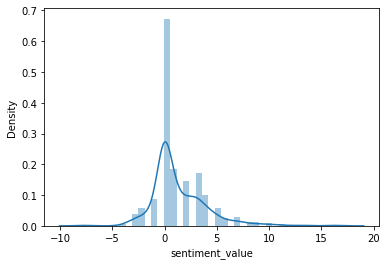

In [153]:
sns.distplot(sent_df['sentiment_value'])

In [ ]:
plt.figure(figsize=(14, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

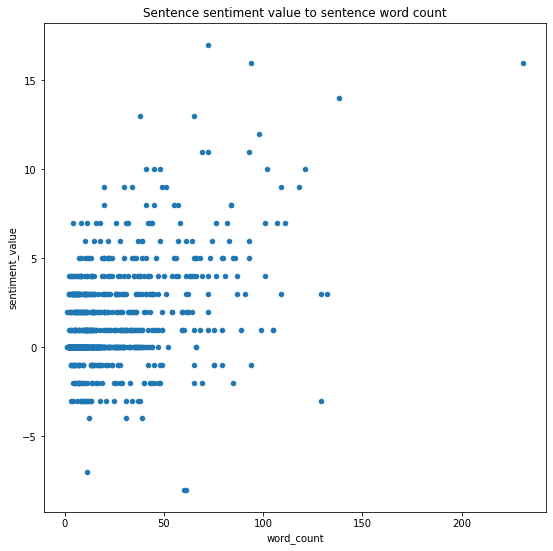

In [155]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(9,9),title='Sentence sentiment value to sentence word count')

In [ ]:
#pw for positive words 
#nw for Negative Words 

In [156]:
pw=pd.read_csv('positive-words.txt',error_bad_lines = False)
pw

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                           
1                           ; Opinion Lexicon: Positive                          
2                                                     ;                          
3     ; This file contains a list of POSITIVE opinio...                          
4                                                     ;                          
...                                                 ...                          
2026                                           youthful                          
2027                                               zeal                          
2028                                             zenith                          
2029                                               zest                          
2030                                              zippy                          

[2031 rows x 1 columns]

In [157]:
nw=pd.read_csv('negative-words.txt', error_bad_lines = False,encoding='latin-1')
nw

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                             
1                           ; Opinion Lexicon: Negative                            
2                                                     ;                            
3     ; This file contains a list of NEGATIVE opinio...                            
4                                                     ;                            
...                                                 ...                            
4803                                               zaps                            
4804                                             zealot                            
4805                                            zealous                            
4806                                          zealously                            
4807                                             zombie                            

[4808 rows x 1 columns]

In [158]:
pw=pw.iloc[25:]
pw=pw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
pw.reset_index(inplace=True)
pw=pw.drop('index',axis=1)
pw['Score'] = 1
pw

Words  Score
0            a+      1
1        abound      1
2       abounds      1
3     abundance      1
4      abundant      1
...         ...    ...
2001   youthful      1
2002       zeal      1
2003     zenith      1
2004       zest      1
2005      zippy      1

[2006 rows x 2 columns]

In [159]:
nw=nw.iloc[25:]
nw=nw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
nw.reset_index(inplace=True)
nw= nw.drop('index',axis=1)
nw['Score'] = -1
nw

Words  Score
0        2-faced     -1
1        2-faces     -1
2       abnormal     -1
3        abolish     -1
4     abominable     -1
...          ...    ...
4778        zaps     -1
4779      zealot     -1
4780     zealous     -1
4781   zealously     -1
4782      zombie     -1

[4783 rows x 2 columns]

In [160]:
affinity_scores1 = pw.set_index('Words')['Score'].to_dict()
affinity_scores2 = nw.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [161]:
sentiment_lexicon=affinity_scores

def calculate_sentiment(text: str=None):
    sent_score = 0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [162]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)

In [163]:
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                1   
3    @gtera27 Doge is underestimated @teslacn Congr...                0   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -1   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...                0   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
919          11    919  
920          31    920  
921           3    921  
922          47    922  
923          15    923  

[924 rows x 4 columns]

In [164]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                1   
3    @gtera27 Doge is underestimated @teslacn Congr...                0   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -1   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...                0   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
919          11    919  
920          31    920  
921           3    921  
922          47    922  
923          15    923  

[924 rows x 4 columns]

In [165]:
sent_df.sort_values(by='sentiment_value').tail()

sentence  sentiment_value  \
299  It was designed from the beginning with human ...                5   
123  It isnt enough to be safer than human drivers...                5   
105  @Erdayastronaut @SpaceX Was also thinking that...                6   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...                7   
652  Its not useful for predicting the future, nor...                9   

     word_count  index  
299          64    299  
123          51    123  
105          94    105  
36          231     36  
652         118    652

In [166]:
sent_df.sort_values(by='sentiment_value').head()

sentence  sentiment_value  \
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -5   
762  A full blown Starship and SuperHeavy will be h...               -3   
363  4D is essential for dynamically occluded objec...               -3   
886  This is primarily an electrical/electronic (ch...               -3   
156  We couldnt get everything done in
 https://t....               -3   

     word_count  index  
647          60    647  
762          36    762  
363          45    363  
886          69    886  
156          65    156

In [167]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       0.451299
std        1.241573
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [168]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

sentence  sentiment_value  \
6   https://t.co/9WFKMYu2oj Frodo was the underdog...               -1   
11  However, if we don
 https://t.co/9Z8Ac6skqx @R...               -1   
16                        Thats what youre missing.               -1   
23  https://t.co/UEEocOfcTb The people have spoken...               -1   
30  The Second Last Kingdom https://t.co/Je4EI88Hm...               -1   

    word_count  index  
6           14      6  
11          40     11  
16           4     16  
23          37     23  
30          38     30

In [169]:
sent_df[sent_df['sentiment_value']<-1]

sentence  sentiment_value  \
55   You
 https://t.co/6gO7EHq9qy @avalonpenrose A ...               -2   
64   Also, the road to hell is mostly paved with ba...               -2   
156  We couldnt get everything done in
 https://t....               -3   
219  @RGVaerialphotos It will be real soon @MarcusH...               -2   
220  External
 https://t.co/csIZk6sEVu @bcart03 @ne...               -2   
240  @RationalEtienne @ShyCybertruck Fate loves iro...               -2   
296  No symptoms for past few days, apart from fati...               -2   
304  Last week, I had sym
 https://t.co/gL0mhrqJxY ...               -2   
329  Their main PCR search is for the N1 gene, uniq...               -2   
363  4D is essential for dynamically occluded objec...               -3   
374  The Model 3 ramp was extreme stress &amp; pa
 ...               -2   
391  Transferring propellant
 https://t.co/vPIIPpDV...               -2   
436  @SpaceX Just a small-seeming issue with loss o...               -2   
525  Hollywood should just start with the sequel &a...               -2   
564  @podcastnotes Genetic engineering is too slow ...               -2   
611  Then static fire, checkouts, static fire, fly ...               -2   
642  Its when you hang out there that problems arise.               -2   
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -5   
653  Ahem 
 starting soon https://t.co/eCGHH5stOn ...               -2   
720  @CowderySedge @tbdnonymous Very real possibili...               -2   
732  Will only be on relatively recent cars,
 https...               -2   
762  A full blown Starship and SuperHeavy will be h...               -3   
838  Poseurs @engineers_feed [slow drag on cigarett...               -2   
886  This is primarily an electrical/electronic (ch...               -3   
887  Will those who write the algorithms ever reali...               -2   
891  Ratio of retirees to workers is
 https://t.co/...               -2   

     word_count  index  
55           30     55  
64           11     64  
156          65    156  
219          18    219  
220          31    220  
240          42    240  
296           9    296  
304          41    304  
329          28    329  
363          45    363  
374          26    374  
391          39    391  
436          11    436  
525          66    525  
564          16    564  
611          12    611  
642           9    642  
647          60    647  
653          12    653  
720          35    720  
732          16    732  
762          36    762  
838           7    838  
886          69    886  
887          11    887  
891          61    891

In [170]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

55     You
 https://t.co/6gO7EHq9qy @avalonpenrose A ...
64     Also, the road to hell is mostly paved with ba...
156    We couldnt get everything done in
 https://t....
219    @RGVaerialphotos It will be real soon @MarcusH...
220    External
 https://t.co/csIZk6sEVu @bcart03 @ne...
240    @RationalEtienne @ShyCybertruck Fate loves iro...
296    No symptoms for past few days, apart from fati...
304    Last week, I had sym
 https://t.co/gL0mhrqJxY ...
329    Their main PCR search is for the N1 gene, uniq...
363    4D is essential for dynamically occluded objec...
374    The Model 3 ramp was extreme stress &amp; pa
 ...
391    Transferring propellant
 https://t.co/vPIIPpDV...
436    @SpaceX Just a small-seeming issue with loss o...
525    Hollywood should just start with the sequel &a...
564    @podcastnotes Genetic engineering is too slow ...
611    Then static fire, checkouts, static fire, fly ...
642    Its when you hang out there that problems arise.
647    Very ba
 https://t.co/tJ

In [171]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['You\x85 https://t.co/6gO7EHq9qy @avalonpenrose A hedge fund that shorts is a shrubbery @lafebra @Gfilche https://t.co/M0WwQSTAXm @lafebra @Gfilche Yeah, also a rear screen 0 to 155mph trap speed in a 1/4 mile.',
 'Also, the road to hell is mostly paved with bad intentions.',
 'We couldn\x92t get everything done in\x85 https://t.co/7HkZA1OhE4 @westcoastbill The writing on Cobra Kai is sick<U+0001F44C> @AfloatHickory Haha I will save you the nightmare of seeing me in those shorts @h3_extrachars You can upload custom music/sounds @jgrano305 Unfortunately, pedestrian speaker is needed, otherwise no external sound generator except actual horn Change your horn sound to <U+0001F410>, <U+0001F40D><U+0001F3B7>, <U+0001F4A8> or holiday jingles with latest Tesla software update!',
 '@RGVaerialphotos It will be real soon @MarcusHouseGame @bcart03 @nextspaceflight @NASASpaceflight Starship legs are one of the hardest problems.',
 'External\x85 https://t.co/csIZk6sEVu @bcart03 @nextspaceflight @NA

In [172]:
sent_df['index'] = range(0, len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

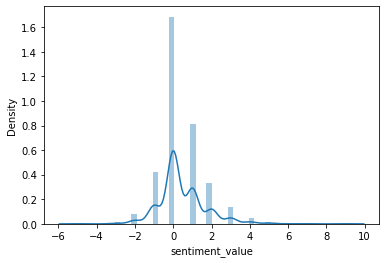

In [173]:
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

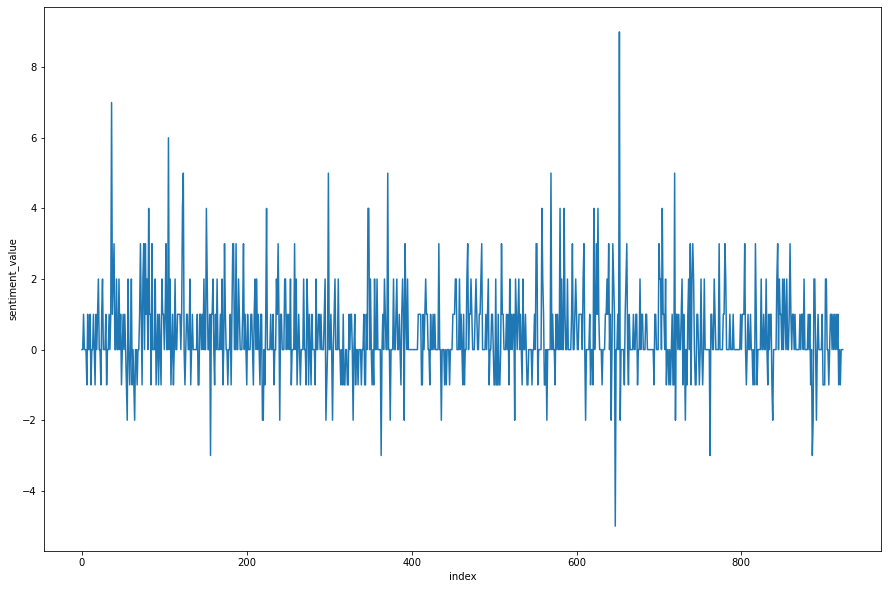

In [174]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

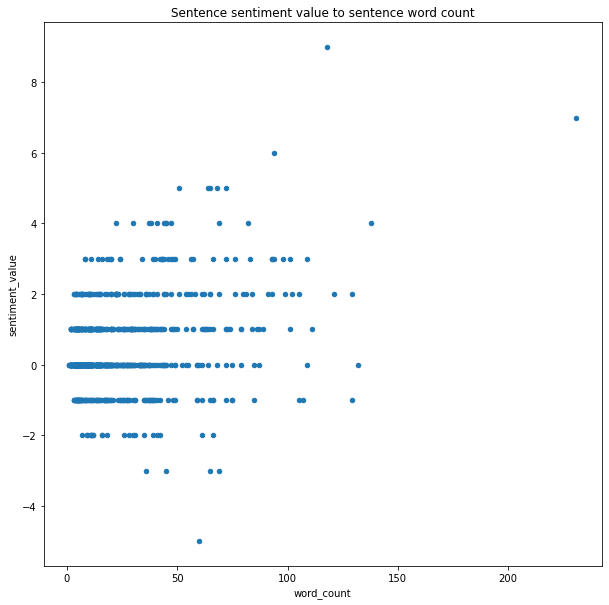

In [175]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')